# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助


# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [38]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 設定 data_path
dir_data = '../../.././data/'

### 之前做過的處理

In [27]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [28]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH']) /365
app_train['DAYS_BIRTH']

0         25.920548
1         45.931507
2         52.180822
3         52.068493
4         54.608219
5         46.413699
6         37.747945
7         51.643836
8         55.065753
9         39.641096
10        27.936986
11        55.936986
12        36.819178
13        38.591781
14        39.953425
15        23.912329
16        35.427397
17        26.783562
18        48.542466
19        31.090411
20        50.005479
21        40.589041
22        30.536986
23        68.019178
24        30.920548
25        52.969863
26        51.298630
27        43.693151
28        27.380822
29        28.331507
            ...    
307481    56.558904
307482    38.646575
307483    68.249315
307484    35.197260
307485    32.802740
307486    43.863014
307487    63.356164
307488    27.649315
307489    45.126027
307490    27.052055
307491    30.071233
307492    57.438356
307493    48.035616
307494    40.980822
307495    57.320548
307496    47.520548
307497    45.695890
307498    52.334247
307499    46.542466


## 練習時間
### 參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [35]:
bins = [0, 12, 18, 31, 50,100]
app_train['DAYS_BIRTH_WIDTH'] = pd.cut(app_train['DAYS_BIRTH'],bins)
app_train['DAYS_BIRTH_WIDTH']

0          (18, 31]
1          (31, 50]
2         (50, 100]
3         (50, 100]
4         (50, 100]
5          (31, 50]
6          (31, 50]
7         (50, 100]
8         (50, 100]
9          (31, 50]
10         (18, 31]
11        (50, 100]
12         (31, 50]
13         (31, 50]
14         (31, 50]
15         (18, 31]
16         (31, 50]
17         (18, 31]
18         (31, 50]
19         (31, 50]
20        (50, 100]
21         (31, 50]
22         (18, 31]
23        (50, 100]
24         (18, 31]
25        (50, 100]
26        (50, 100]
27         (31, 50]
28         (18, 31]
29         (18, 31]
            ...    
307481    (50, 100]
307482     (31, 50]
307483    (50, 100]
307484     (31, 50]
307485     (31, 50]
307486     (31, 50]
307487    (50, 100]
307488     (18, 31]
307489     (31, 50]
307490     (18, 31]
307491     (18, 31]
307492    (50, 100]
307493     (31, 50]
307494     (31, 50]
307495    (50, 100]
307496     (31, 50]
307497     (31, 50]
307498    (50, 100]
307499     (31, 50]


In [36]:
app_train['DAYS_BIRTH_WIDTH'].value_counts()

(31, 50]     151033
(50, 100]    103641
(18, 31]      52837
(12, 18]          0
(0, 12]           0
Name: DAYS_BIRTH_WIDTH, dtype: int64

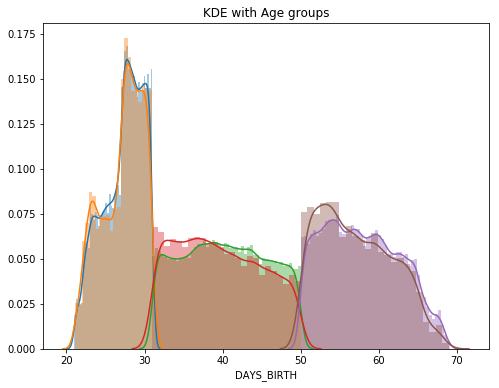

In [41]:
days_birth_sorted = app_train['DAYS_BIRTH_WIDTH'].unique().sort_values()
plt.figure(figsize = (8,6))
for i in range (len(days_birth_sorted)):
    sns.distplot(app_train.loc[(app_train['DAYS_BIRTH_WIDTH'] == days_birth_sorted[i]) & \
                              (app_train['TARGET'] == 0), 'DAYS_BIRTH'], label = str(days_birth_sorted[i]))
    
    sns.distplot(app_train.loc[(app_train['DAYS_BIRTH_WIDTH'] == days_birth_sorted[i]) & \
                              (app_train['TARGET'] == 1), 'DAYS_BIRTH'],label = str(days_birth_sorted[i]))
plt.title('KDE with Age groups')
plt.show()

Text(0, 0.5, 'TARGET')

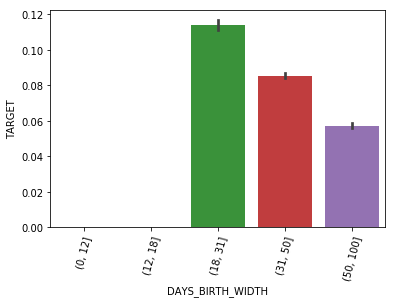

In [42]:
px = app_train['DAYS_BIRTH_WIDTH'] 
py = app_train['TARGET']
sns.barplot(px, py)

plt.xticks(rotation = 75);
plt.xlabel('day of birth interval'); 
plt.ylabel('TARGET')